In [3]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import json
import time
import os
import random
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

import matplotlib.pyplot as plt

In [4]:
# Load training and test data
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv")
y_test = pd.read_csv("data/y_test.csv")

# test for shape.
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# test for 1st few lines of X_train
X_train.head()

X_train shape: (37588, 14)
X_test shape: (9397, 14)
y_train shape: (37588, 1)
y_test shape: (9397, 1)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,key_encoded,mode_encoded
0,0.779745,-0.579031,1.517474,-0.259931,0.242913,-0.510513,-0.626831,0.557076,-0.434952,-0.190021,0.262969,0.975443,0.761913,-0.706712
1,0.895945,1.002644,-0.311073,0.551289,0.077729,-0.510531,-0.102380,-0.258805,1.379118,-0.910648,0.262969,-1.187526,0.185036,-0.706712
2,-0.033658,0.435785,1.442621,-0.868951,-0.065430,1.863912,-0.541478,-1.176206,-0.065907,0.385209,0.262969,-1.119933,1.338790,1.415004
3,0.895945,-0.979427,0.779639,0.416626,0.804537,-0.510509,0.563667,0.973855,-0.383920,-0.743724,0.262969,0.119268,-0.968718,-0.706712
4,1.651248,0.380481,0.309136,-0.605198,-0.047076,-0.510531,1.086638,0.000019,-0.420986,-0.214647,0.262969,0.885319,-0.391841,-0.706712


In [5]:
# Check the columns in y_train
print("y_train columns:", y_train.columns.tolist())

# Extract the target as a 1D array (ravel)
y_train_target = y_train["genre_encoded"].values.ravel()
y_test_target = y_test["genre_encoded"].values.ravel()

# Quick checks
print("Unique genres in y_train:", np.unique(y_train_target))
print("Number of classes:", len(np.unique(y_train_target)))

y_train columns: ['genre_encoded']
Unique genres in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Number of classes: 24


In [8]:
# Define the Logistic Regression model
log_reg = LogisticRegression(
    multi_class="multinomial",   # handles multi-class classification
    solver="lbfgs",              # works well with multinomial
    max_iter=1000,               # increase iterations to help convergence
    n_jobs=-1                    # use all CPU cores (if allowed)
)

# Train the model
log_reg.fit(X_train, y_train_target)

print("model training complete.")

C:\Users\14705\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


model training complete.


In [9]:
# Make predictions on train and test sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print("predictions complete.")

predictions complete.


In [10]:
# Compute accuracy on train and test
train_accuracy = accuracy_score(y_train_target, y_train_pred)
test_accuracy = accuracy_score(y_test_target, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:  {test_accuracy:.4f}")

Train Accuracy: 0.4457
Test Accuracy:  0.4479


Confusion matrix (raw counts):
[[ 43   8   3   3   0   1  61  37  30  16  29  12   7   0   0   6  20   6
    5  30  20  11   2  13]
 [  6 135  12   8  20   0   8   2  17   0   0   0   7  18   6   0   2  16
   13   2  80   0  32  16]
 [  2  33 109   8   3   1  23   1   8  16   1   0  25   7   3   0   2  27
    8   1  69   4   1  48]
 [  9   9   0 263   0   5   4   3   0   0   4   6   0  49  13   0   2   5
    5   3  14   3   0   3]
 [  4   6   1   2 192   1   0   1  10   4   0   0  20   9  66   0   0   0
    0   3   0   0  70  11]
 [  0   1   2   6   1 369   1   0   0   0   2   0   1  10   0   0   1   2
    1   1   2   0   0   0]
 [  7   2   9   2   0   1 177  22   4  49   4  10   0   0   0   7  13   9
   19  12  22  16   0  15]
 [ 26   3   0   4   0   0  19 128  19   5  45  33   1   0   0  14  23   4
   15  49   2   8   0   2]
 [ 13  18   6   0   3   0   6  21 188   1  11   2  14   0   0   1  15  19
   42   3  11   3   7  16]
 [ 11   1  10   1   3   1  67  15   9 150   1  10  21   2   

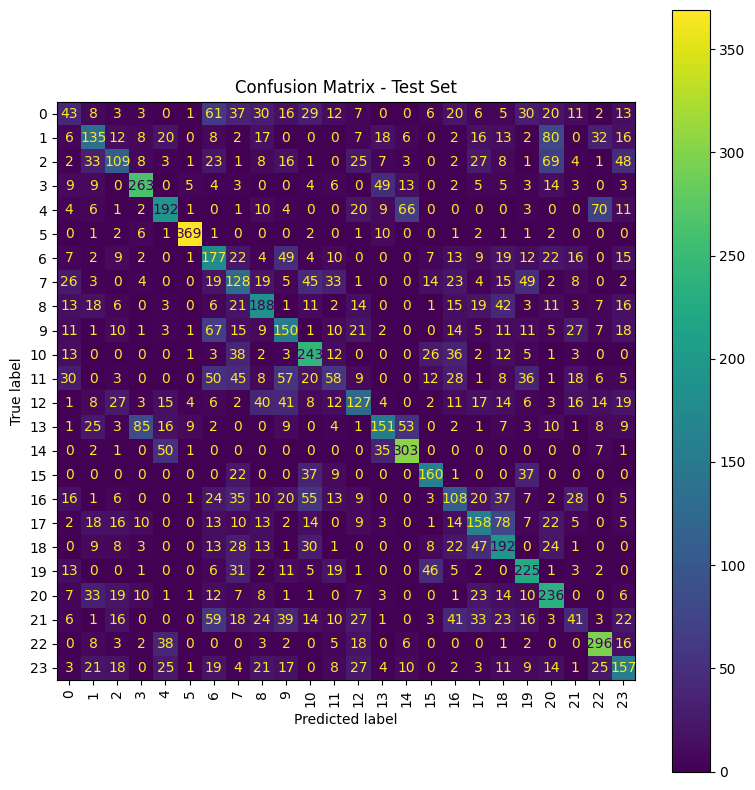

In [12]:
# Compute confusion matrix on test set
cm = confusion_matrix(y_test_target, y_test_pred)

print("Confusion matrix (raw counts):")
print(cm)

# display with ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, xticks_rotation="vertical")
plt.title("Confusion Matrix - Test Set")
plt.tight_layout()
plt.show()

In [11]:
# Classification report for the test set
report = classification_report(y_test_target, y_test_pred)
print("Classification Report (Test Set):")
print(report)

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.20      0.12      0.15       363
           1       0.39      0.34      0.36       400
           2       0.40      0.27      0.32       400
           3       0.64      0.66      0.65       400
           4       0.52      0.48      0.50       400
           5       0.93      0.92      0.93       400
           6       0.31      0.44      0.36       400
           7       0.27      0.32      0.29       400
           8       0.44      0.47      0.45       400
           9       0.34      0.38      0.36       400
          10       0.46      0.61      0.53       400
          11       0.26      0.15      0.19       395
          12       0.38      0.32      0.35       400
          13       0.51      0.38      0.43       400
          14       0.66      0.76      0.70       400
          15       0.55      0.60      0.58       266
          16       0.30      0.27      0.28    

In [12]:
import json
import time
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


# Ensure output folder exists
os.makedirs("output", exist_ok=True)


#Hyperparameter Grid 
param_grid = {
    "C": [0.1, 1.0, 10],
    "solver": ["lbfgs", "saga"],
    "penalty": ["l2"]
}

trials = []
best_accuracy = -1
best_confusion_matrix = None
best_hyperparams = None
total_train_time = 0.0
total_test_time = 0.0

y_train_flat = y_train_target
y_test_flat = y_test_target


# Run all valid hyperparameter combinations
for C in param_grid["C"]:
    for solver in param_grid["solver"]:
        for penalty in param_grid["penalty"]:
            
            # Skip invalid combinations
            if solver == "lbfgs" and penalty != "l2":
                continue
            
            hyperparams = {
                "C": C,
                "solver": solver,
                "penalty": penalty
            }
            
            # Timing: Train
            start_train = time.time()
            model = LogisticRegression(
                C=C,
                solver=solver,
                penalty=penalty,
                multi_class="multinomial",
                max_iter=2000,
                n_jobs=-1
            )
            model.fit(X_train, y_train_flat)
            end_train = time.time()
            
            # Timing: Test
            start_test = time.time()
            y_pred = model.predict(X_test)
            end_test = time.time()
            
            train_time = end_train - start_train
            test_time = end_test - start_test
            
            total_train_time += train_time
            total_test_time += test_time
            
            # Confusion matrix
            cm = confusion_matrix(y_test_flat, y_pred)
            accuracy = np.mean(y_pred == y_test_flat)
            
            # Store trial
            trials.append({
                "hyperparameters": hyperparams,
                "confusion_matrix": cm.tolist()
            })
            
            # Track best model
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_hyperparams = hyperparams
                best_confusion_matrix = cm.tolist()


# Build final JSON object
output_data = {
    "model_name": "Logistic Regression",
    "person_name": "Tyler Varma",  
    "best_hyperparameters": best_hyperparams,
    "best_confusion_matrix": best_confusion_matrix,
    "trials": trials,
    "total_train_time": total_train_time,
    "total_test_time": total_test_time
}


# Save JSON to output folder
output_path = "output/logistic_regression.json"

with open(output_path, "w") as f:
    json.dump(output_data, f, indent=2)

print("JSON file created successfully:", output_path)

C:\Users\14705\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\14705\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\14705\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\14705\AppData\Local\Programs\Python\P

JSON file created successfully: output/logistic_regression.json
